In [1]:
import pandas as pd

df1= pd.read_excel("/home/tugce/Masaüstü/DxA23' Veri Seti.xlsx", sheet_name="İlçe Bazlı Maliyetler")
df2= pd.read_excel("/home/tugce/Masaüstü/DxA23' Veri Seti.xlsx", sheet_name="BrewStation Lokasyonları")

birlesik= pd.merge(df1, df2, on='İLÇE', how='inner')

In [2]:
print(birlesik.head())

   #_x        İLÇE  KAHVE DÜKKANI AÇMA MALİYETİ  #_y     ŞEHİR  \
0    2  ARNAVUTKÖY                       201000  128  İSTANBUL   
1    2  ARNAVUTKÖY                       201000  201  İSTANBUL   
2    2  ARNAVUTKÖY                       201000  202  İSTANBUL   
3    2  ARNAVUTKÖY                       201000  203  İSTANBUL   
4    3    ATAŞEHİR                       486000    9  İSTANBUL   

                                          AÇIK ADRES         MAHALLE  
0  New Airport International E31: Tayakadın Mahal...       TAYAKADIN  
1  Tayakadın Mahallesi, Terminal Caddesi. Havalim...       TAYAKADIN  
2  Tayakadın Mahallesi, Terminal Caddesi.Havalima...       TAYAKADIN  
3  Tayakadın Mahallesi, Terminal Caddesi. Havalim...       TAYAKADIN  
4  Kucukbakkalkoy Mah. Vedat Gunyol Cad. No.36 At...  KÜÇÜKBAKKALKÖY  


In [3]:
print(birlesik.columns)

Index(['#_x', 'İLÇE', 'KAHVE DÜKKANI AÇMA MALİYETİ', '#_y', 'ŞEHİR',
       'AÇIK ADRES', 'MAHALLE'],
      dtype='object')


In [4]:
print(birlesik.shape)

(272, 7)


In [5]:
print(birlesik.describe())

              #_x  KAHVE DÜKKANI AÇMA MALİYETİ         #_y
count  272.000000                   272.000000  272.000000
mean    20.867647                464305.147059  140.345588
std     11.786107                176227.290262   80.994818
min      2.000000                186000.000000    1.000000
25%     10.000000                315000.000000   69.750000
50%     23.000000                393000.000000  141.500000
75%     30.000000                567000.000000  210.250000
max     39.000000                819000.000000  279.000000


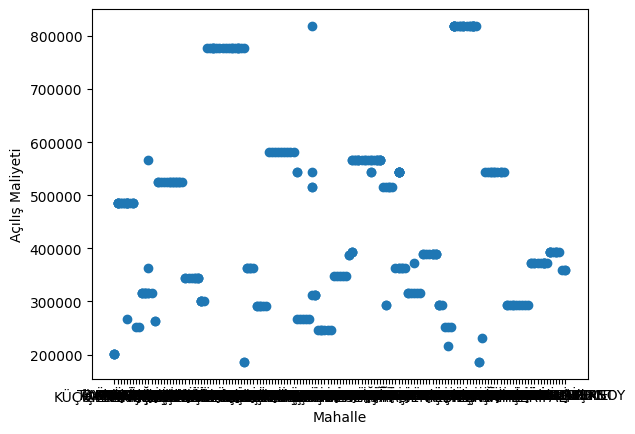

In [6]:
import matplotlib.pyplot as plt

plt.scatter(birlesik["MAHALLE"], birlesik["KAHVE DÜKKANI AÇMA MALİYETİ"])
plt.xlabel("Mahalle")
plt.ylabel("Açılış Maliyeti")
plt.show()

In [7]:
import geocoder

def get_lat_lon(address):
    location = geocoder.osm(address)
    return location.lat, location.lng

birlesik['latitude'], birlesik['longitude'] = zip(*birlesik['AÇIK ADRES'].apply(lambda x: get_lat_lon(x)))

In [8]:
from geopy.geocoders import Nominatim
from geopy.distance import distance

geolocator = Nominatim(user_agent="my_app")

def get_distance(address1, address2):
    location1 = geolocator.geocode(address1)
    location2 = geolocator.geocode(address2)
    coord1 = (location1.latitude, location1.longitude)
    coord2 = (location2.latitude, location2.longitude)
    return distance(coord1, coord2).km

In [17]:
def get_nearest_coffee_shop(location, coffee_shops):
    min_distance = float("inf")
    nearest_coffee_shop = None
    for _, row in coffee_shops.iterrows():
        coffee_shop_address = row["AÇIK ADRES"] + ", " + row["İLÇE"] + ", Turkey"
        distance = get_distance(location, coffee_shop_address)
        if distance < min_distance:
            min_distance = distance
            nearest_coffee_shop = row
    return nearest_coffee_shop

In [11]:
birlesik.isnull().sum()

#_x                              0
İLÇE                             0
KAHVE DÜKKANI AÇMA MALİYETİ      0
#_y                              0
ŞEHİR                            0
AÇIK ADRES                       0
MAHALLE                          0
latitude                       271
longitude                      271
dtype: int64

In [12]:
birlesik.describe()

,#_x,KAHVE DÜKKANI AÇMA MALİYETİ,#_y,latitude,longitude
count,272.000000,272.000000,272.000000,1.000000,1.000000
mean,20.867647,464305.147059,140.345588,40.989991,29.029018
std,11.786107,176227.290262,80.994818,NaN,NaN
min,2.000000,186000.000000,1.000000,40.989991,29.029018
25%,10.000000,315000.000000,69.750000,40.989991,29.029018
50%,23.000000,393000.000000,141.500000,40.989991,29.029018
75%,30.000000,567000.000000,210.250000,40.989991,29.029018
max,39.000000,819000.000000,279.000000,40.989991,29.029018


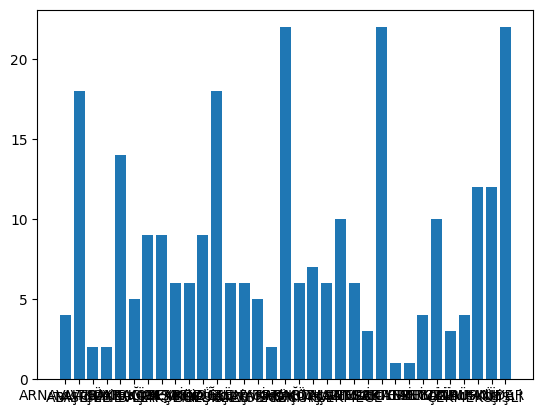

In [13]:
import matplotlib.pyplot as plt
df = pd.merge(df1, df2, on="İLÇE")
df_grouped = df.groupby("İLÇE")["KAHVE DÜKKANI AÇMA MALİYETİ"].count().reset_index(name="KAHVE DÜKKANI SAYISI")
plt.bar(df_grouped["İLÇE"], df_grouped["KAHVE DÜKKANI SAYISI"])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

coordinates = []
for address in df2["AÇIK ADRES"]:
    coordinates.append(get_lat_lon(address))

df_coordinates = pd.DataFrame(coordinates, columns=["latitude", "longitude"])

df_brewstation = pd.concat([df2, df_coordinates], axis=1)

plt.scatter(df_brewstation["longitude"], df_brewstation["latitude"], s=df1["KAHVE DÜKKANI AÇMA MALİYETİ"]/100, alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()